In [149]:
import pandas as pd
import os, json
from ast import literal_eval
import seaborn as sns
sns.set_context(font_scale=1.1)
from matplotlib import pyplot as plt

# Processing text files into one Json File for Wise and PayPal.

In [150]:
all_details = []
for wise_file in os.listdir("./data/Wise"):
    data = [literal_eval(i.strip()) for i in open(f'./data/Wise/{wise_file}').readlines()]
    all_details.extend(data)


In [151]:
df = pd.DataFrame(all_details)
df.head(3)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime
0,Wise,60b8b3f2f9f4870b70161798,5,Fast and transparent money transfer!,"Here is the fast, affordable, and transparent ...",2021-06-03,10:50:26,None,None,None
1,Wise,60b8b1fbf9f4870b70161539,5,Everything you can ask from a money transfer s...,Everything you can ask from a money transfer s...,2021-06-03,10:42:03,None,None,None
2,Wise,60b8b172f9f4870a94b4ca3a,5,Very quick and reliable transactions,I use wise frequently and very happy with the ...,2021-06-03,10:39:46,None,None,None


In [152]:
df.dtypes

platform            object
id                  object
stars                int64
title               object
message             object
review_date         object
review_time         object
CompanyReply        object
CompanyReplyDate    object
CompanyReplyTime    object
dtype: object

In [153]:
df["review_datetime"] = df["review_date"] +"T"+ df["review_time"]
df["review_datetime"]  = pd.to_datetime(df["review_datetime"])
df["company_reply_datetime"] = df["CompanyReplyDate"] + "T" + df["CompanyReplyTime"]
df["company_reply_datetime"] = pd.to_datetime(df["company_reply_datetime"])

df = df[df["review_datetime"]>="2021-10-01"]
df.head(2)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime
20,Wise,6280b7c6f03a9893e98def64,4,"Usually very efficient,",Useful,2022-05-15,10:20:22,None,None,None,2022-05-15 10:20:22,NaT
21,Wise,6280ad07166eb7ecbf474180,5,Wise is simple to use,"Wise is simple to use, v fast & gets it right ...",2022-05-15,09:34:31,None,None,None,2022-05-15 09:34:31,NaT


In [154]:
df['Month-Year'] = df['review_datetime'].dt.strftime('%y-%m')


<Axes: xlabel='Month-Year', ylabel='Count'>

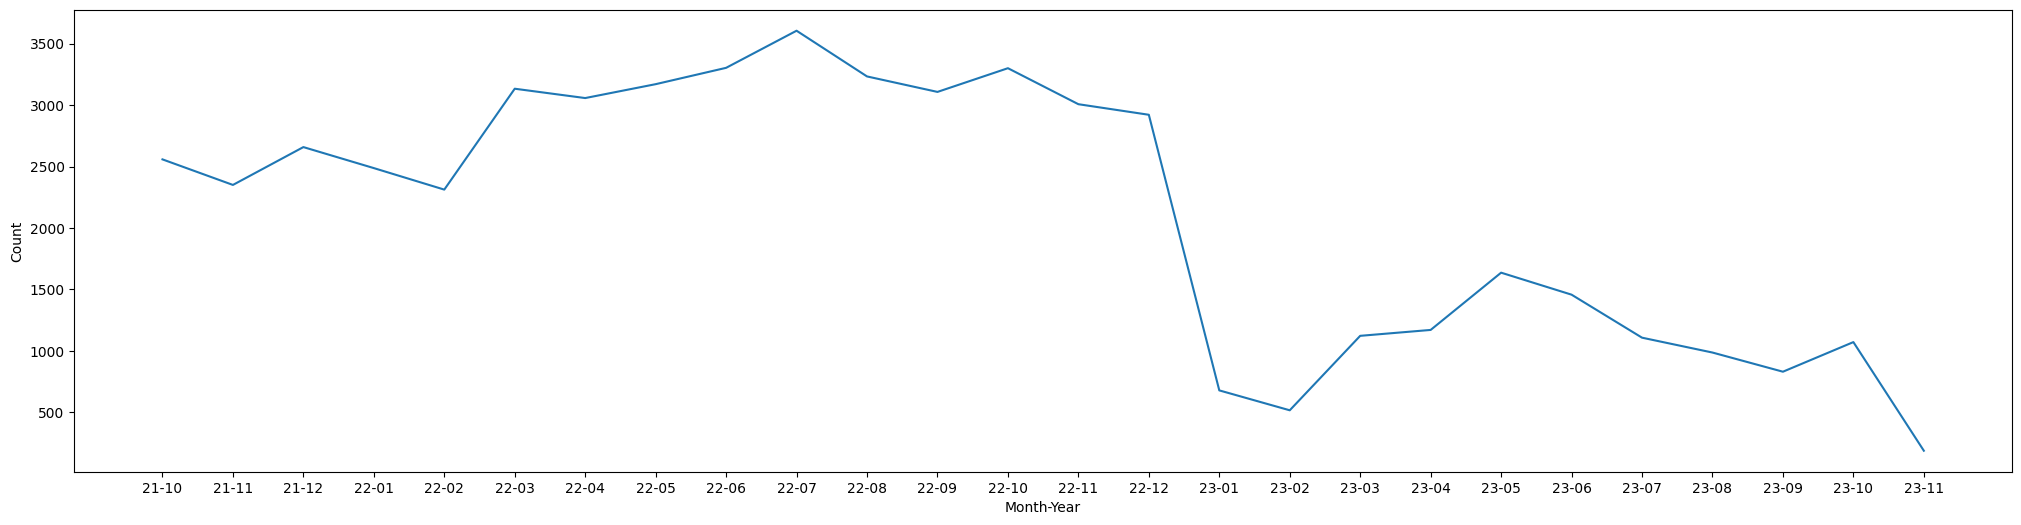

In [155]:
reviews_over_time = df.groupby('Month-Year').size().reset_index(name='Count')
plt.figure(figsize=(25, 6))
sns.lineplot(data= reviews_over_time, x="Month-Year", y="Count")

In [156]:
ratings_over_time = df.groupby('Month-Year').agg({'stars': 'mean'}).reset_index()
ratings_over_time['stars'] = ratings_over_time['stars'].round(1)

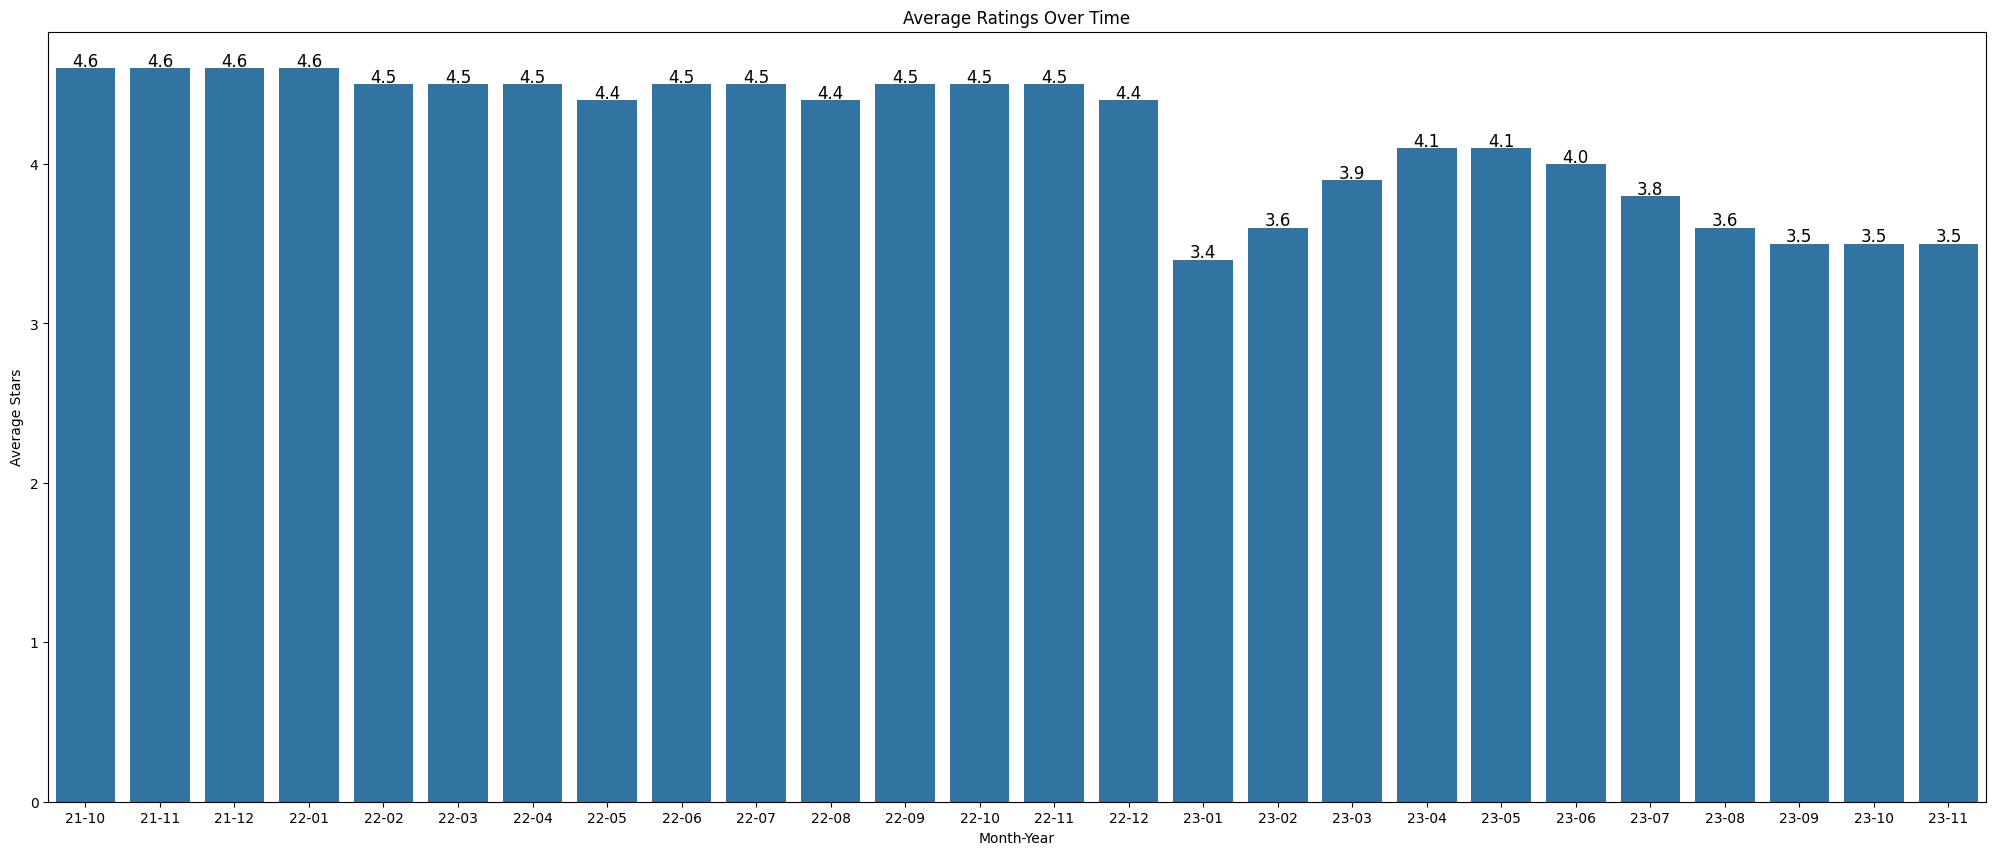

In [157]:
plt.figure(figsize=(25, 10))
# sns.barplot(data= ratings_over_time, x="Month-Year", y="stars")

ax = sns.barplot(data=ratings_over_time, x="Month-Year", y="stars")

# Add labels within the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels
plt.title('Average Ratings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Stars')

plt.show()


In [158]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')

<Axes: xlabel='Month-Year', ylabel='Count'>

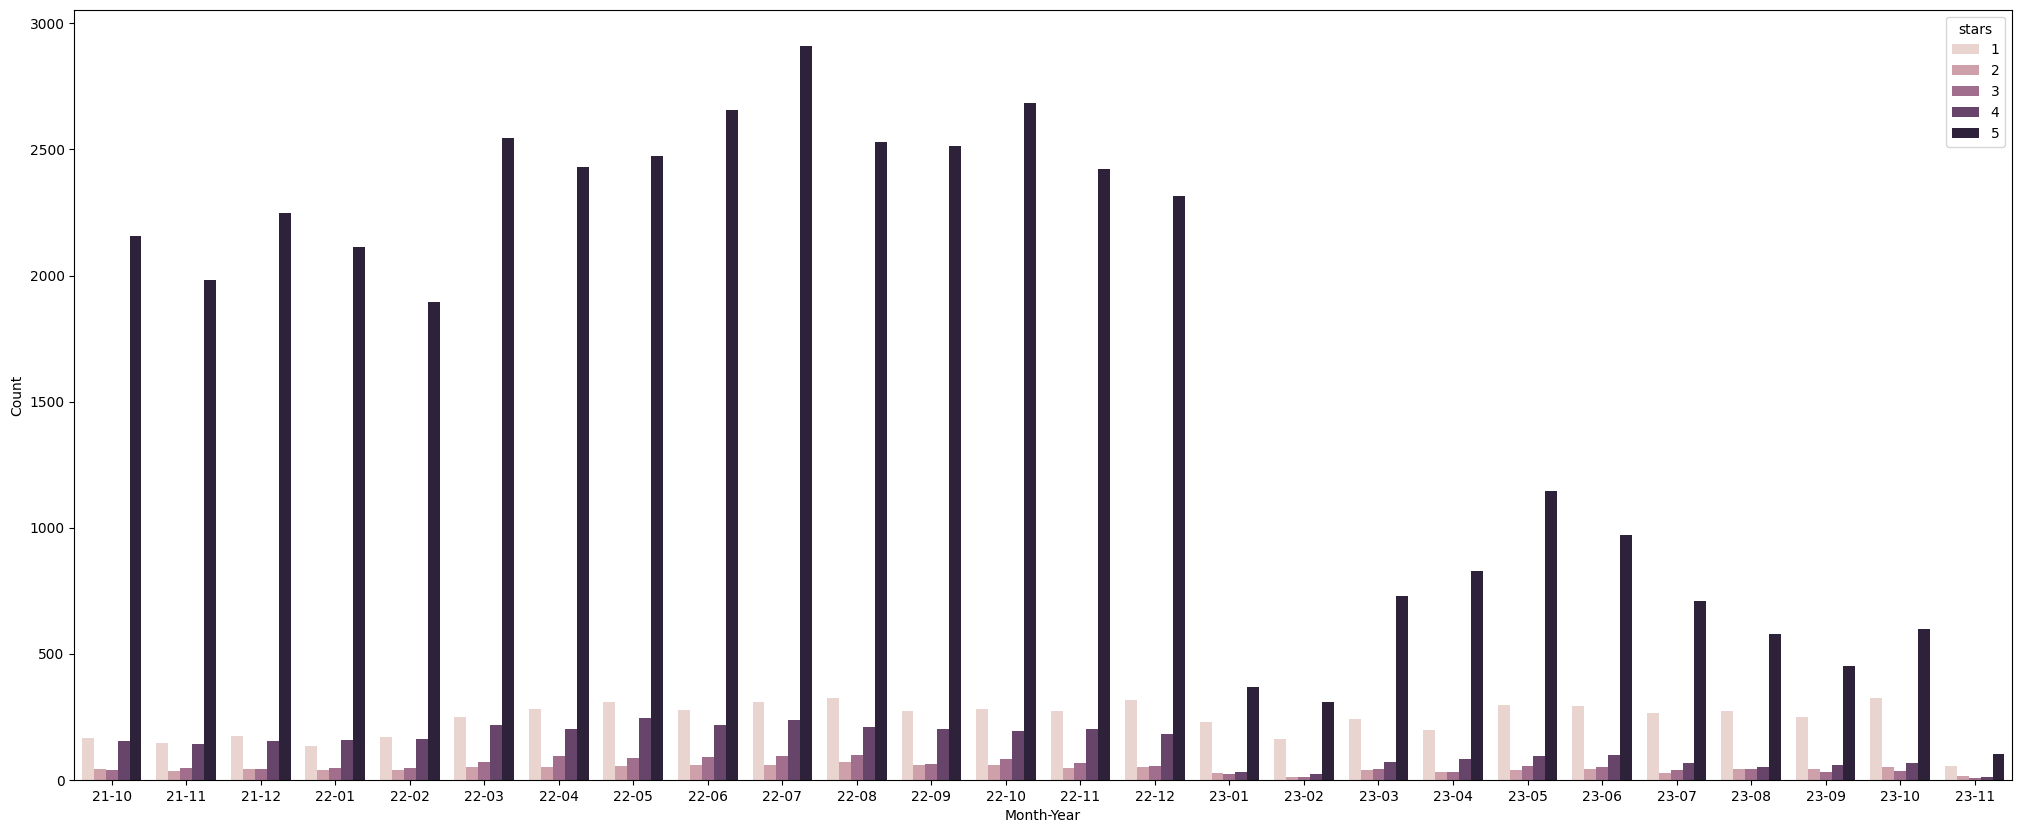

In [159]:
plt.figure(figsize=(25, 10))
sns.barplot(data=ratings_overtime_2, x="Month-Year", y="Count", hue="stars")

In [160]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')


# Pivot the table to make it easier to calculate percentages
pivoted = ratings_overtime_2.pivot(index='Month-Year', columns='stars', values='Count')

# Calculate the percentages
pivoted['1-Star %'] = ((pivoted[1] / pivoted.sum(axis=1)) * 100).round(1)
pivoted['5-Star %'] = ((pivoted[5] / pivoted.sum(axis=1)) * 100).round(1)

# Reset the index
pivoted.reset_index(inplace=True)

In [161]:
pivoted

stars,Month-Year,1,2,3,4,5,1-Star %,5-Star %
0,21-10,165,41,39,155,2158,6.5,84.1
1,21-11,145,36,46,141,1982,6.2,84.1
2,21-12,172,42,41,154,2249,6.5,84.4
3,22-01,134,39,45,156,2113,5.4,84.8
4,22-02,169,37,46,163,1897,7.3,81.8
5,22-03,247,52,71,218,2545,7.9,81.0
6,22-04,282,49,94,202,2430,9.2,79.3
7,22-05,308,56,87,244,2475,9.7,77.8
8,22-06,276,60,92,218,2657,8.4,80.2
9,22-07,308,57,93,238,2909,8.5,80.5


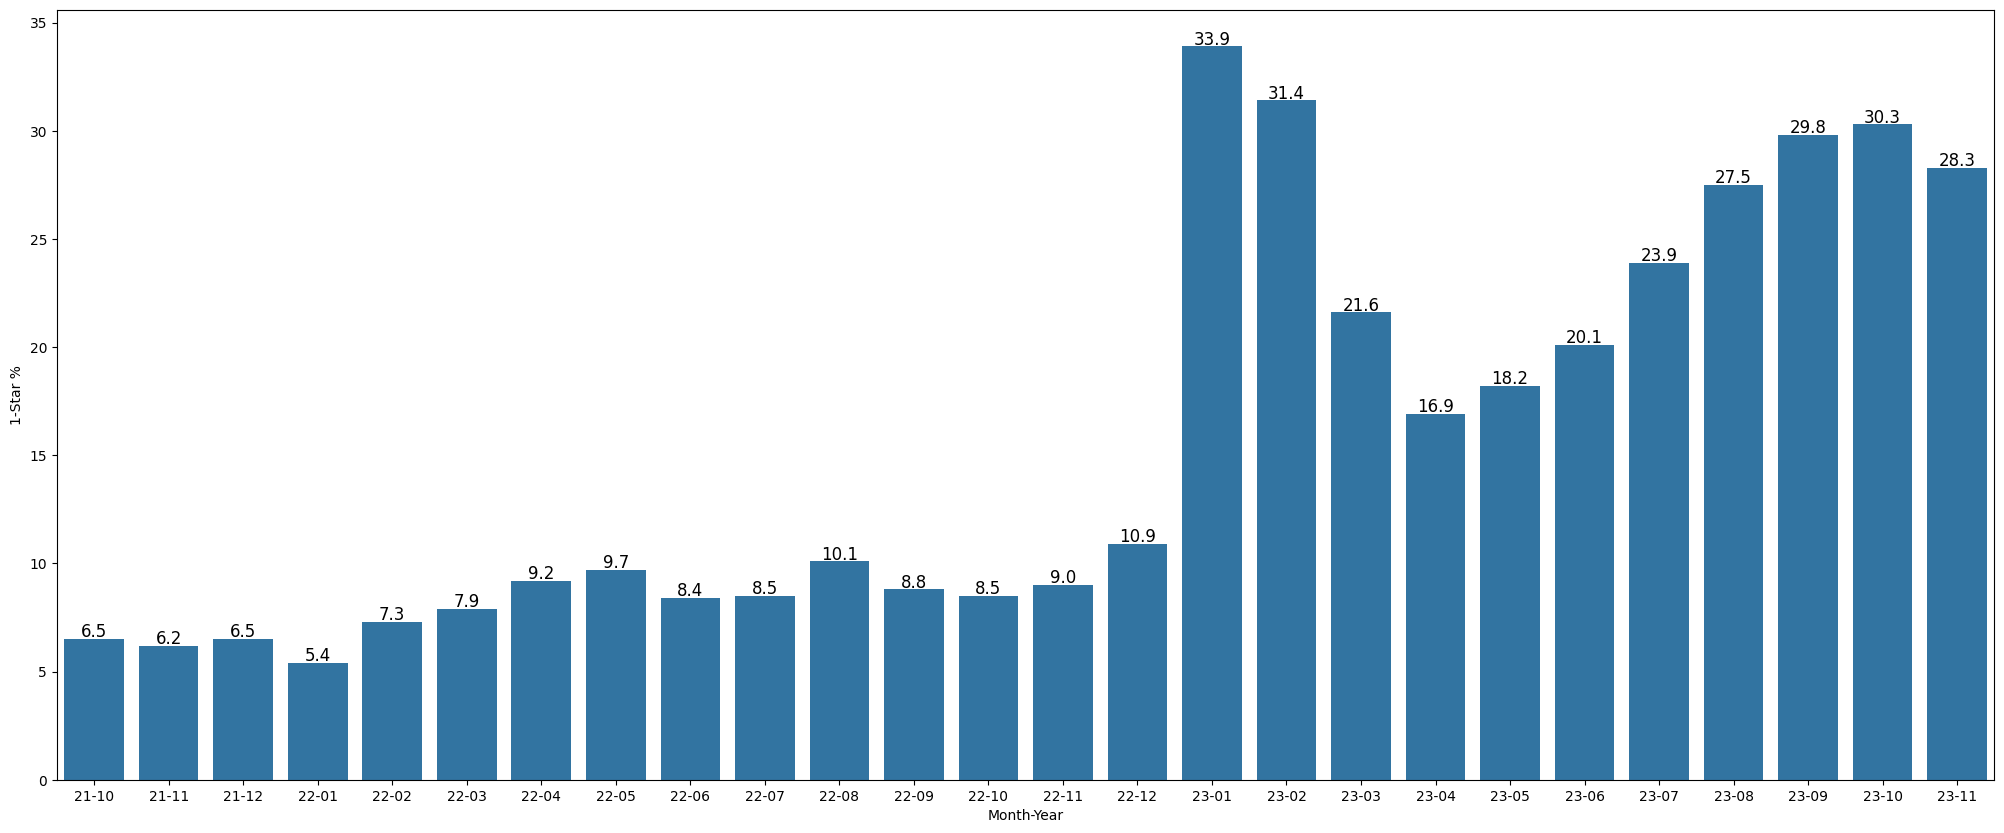

In [162]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=pivoted, x="Month-Year", y="1-Star %")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [163]:
reply_rate = df.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate)

   Month-Year  Reply Rate
0       21-10    9.655981
1       21-11    8.893617
2       21-12    8.653123
3       22-01    8.725372
4       22-02   10.899654
5       22-03   11.650176
6       22-04    4.088976
7       22-05    1.798107
8       22-06    4.995459
9       22-07    5.076283
10      22-08    3.835447
11      22-09    7.434825
12      22-10    6.909091
13      22-11    6.883937
14      22-12    5.306402
15      23-01   21.681416
16      23-02   25.387597
17      23-03    6.773619
18      23-04   11.880342
19      23-05   17.298289
20      23-06   20.041181
21      23-07   28.184282
22      23-08   38.945233
23      23-09   24.819277
24      23-10   22.502334
25      23-11    8.556150


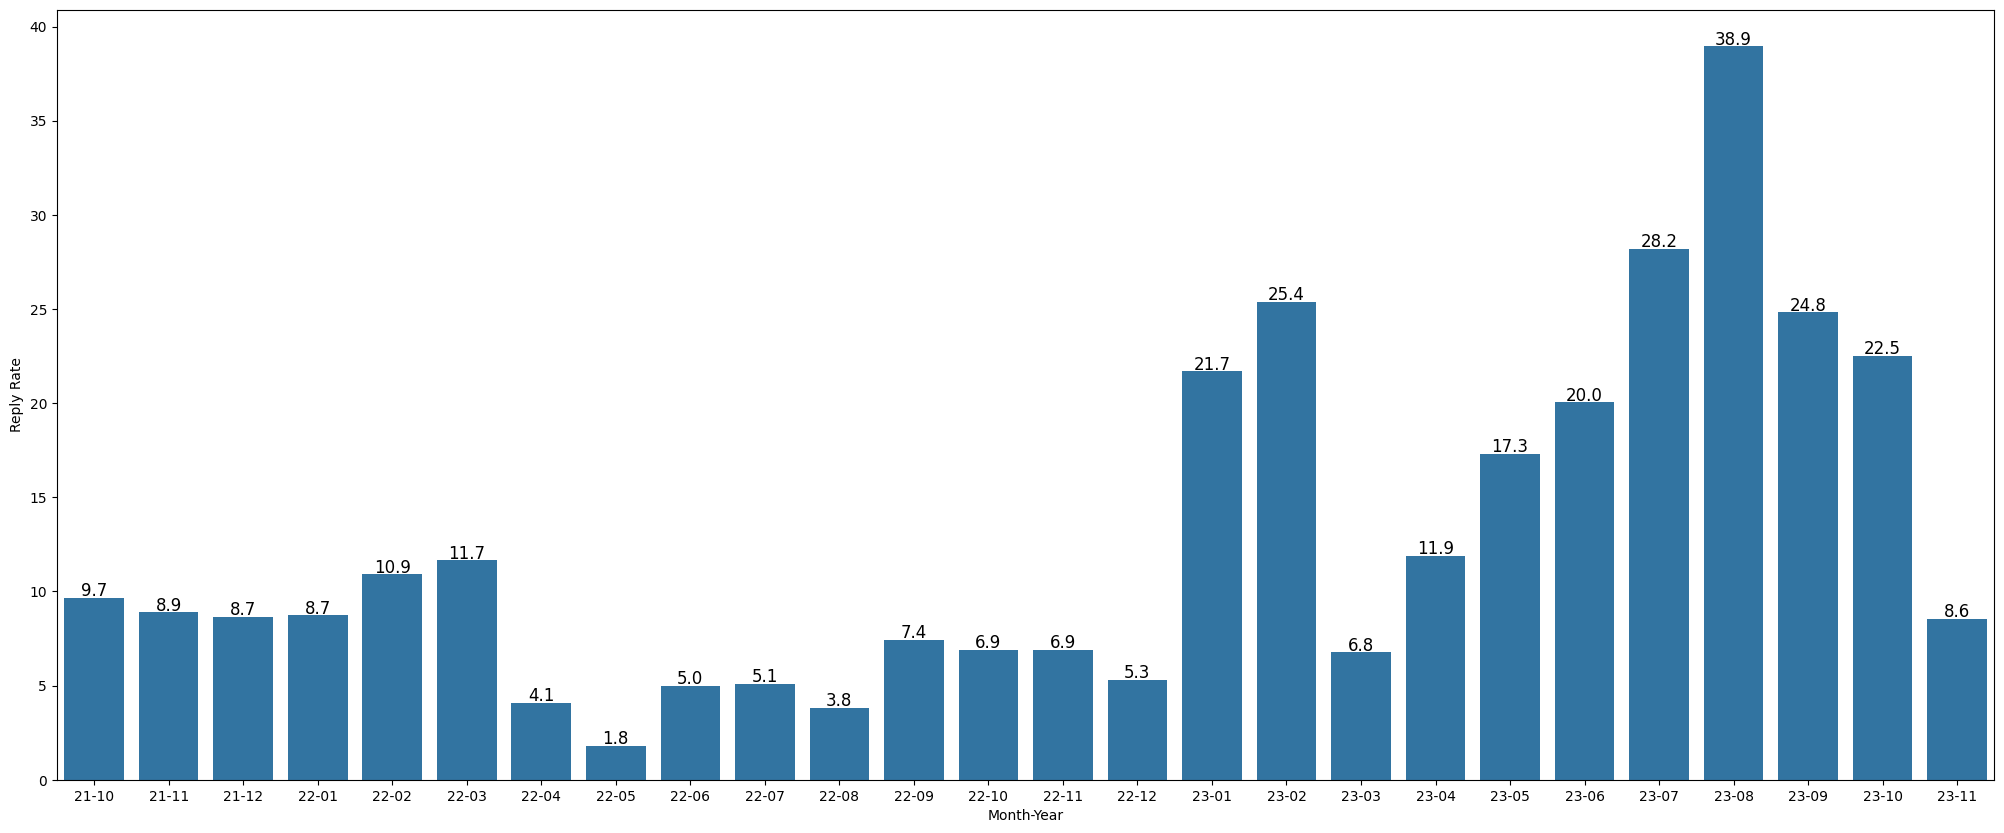

In [164]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [165]:
df_low_ratings = df[df["stars"]<=3]
reply_rate_for_low_ratings = df_low_ratings.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate_for_low_ratings)

   Month-Year  Reply Rate
0       21-10   99.183673
1       21-11   91.189427
2       21-12   88.627451
3       22-01   99.541284
4       22-02   98.412698
5       22-03   97.567568
6       22-04   29.176471
7       22-05   11.973392
8       22-06   38.084112
9       22-07   39.956332
10      22-08   24.798387
11      22-09   58.778626
12      22-10   53.080569
13      22-11   52.480418
14      22-12   35.446009
15      23-01   52.877698
16      23-02   70.491803
17      23-03   23.364486
18      23-04   36.293436
19      23-05   58.883249
20      23-06   50.645995
21      23-07   73.413897
22      23-08   92.977528
23      23-09   49.056604
24      23-10   43.031785
25      23-11   17.567568


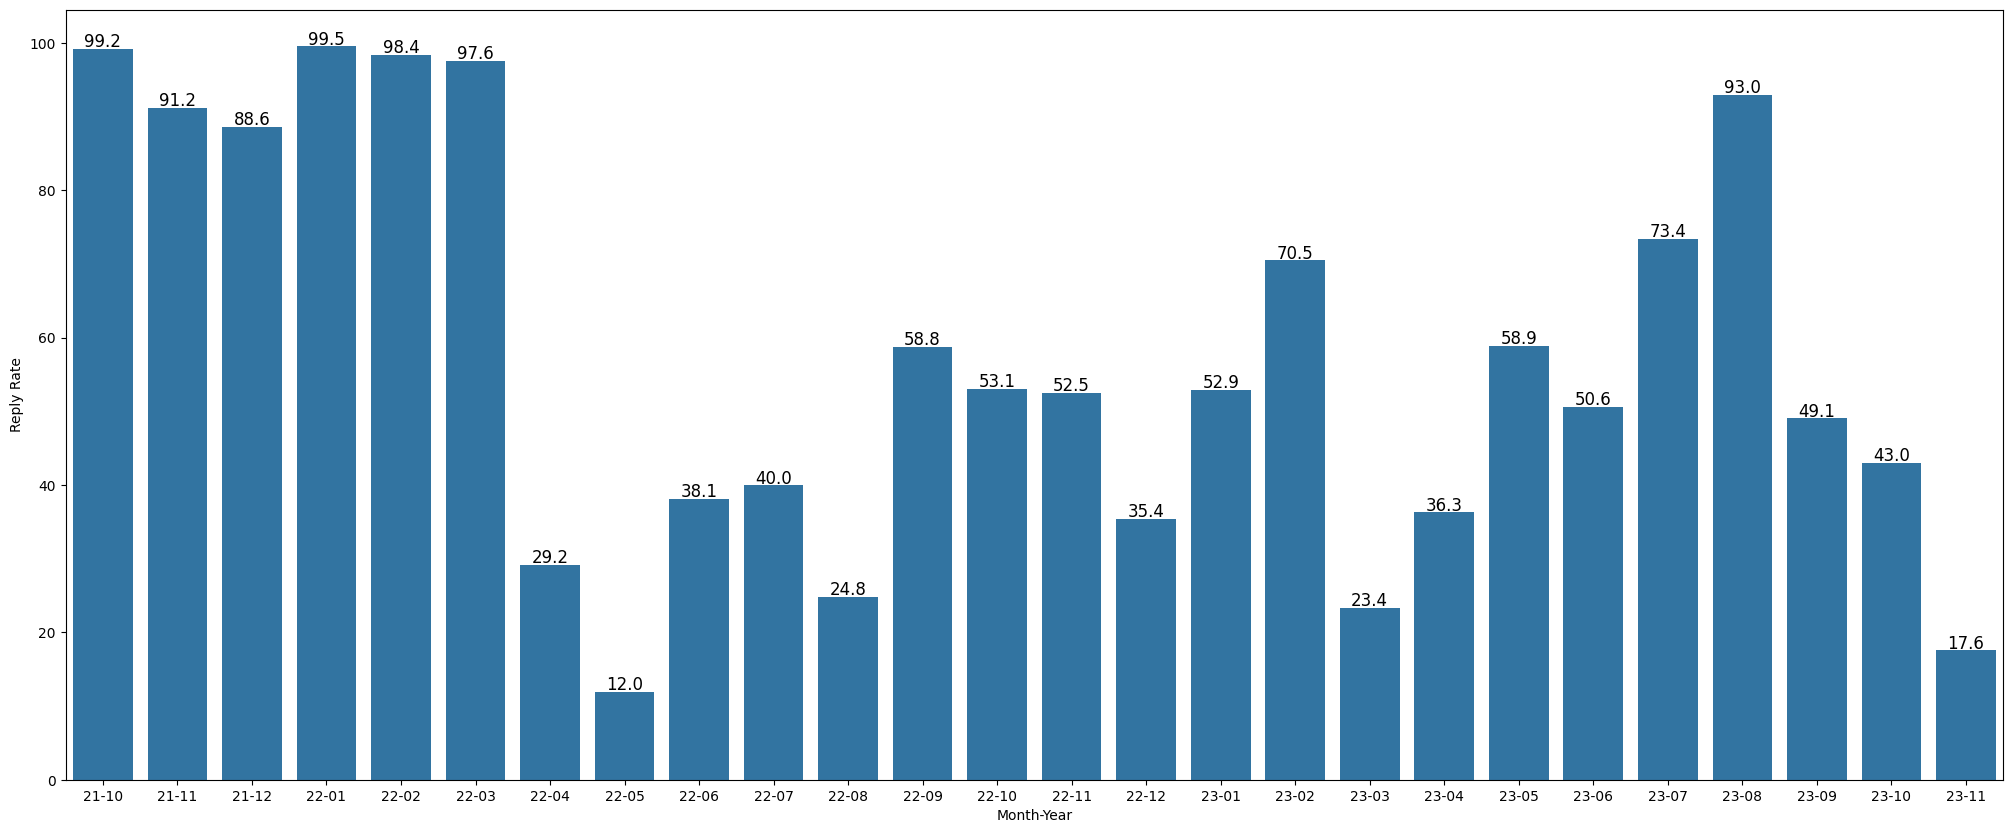

In [166]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate_for_low_ratings, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [167]:
df_high_ratings = df[df["stars"]>=3]
reply_rate_for_high_ratings = df_high_ratings.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate_for_high_ratings)

   Month-Year  Reply Rate
0       21-10    1.785714
1       21-11    1.982480
2       21-12    1.800327
3       22-01    1.944685
4       22-02    2.326686
5       22-03    2.646436
6       22-04    1.173881
7       22-05    0.463293
8       22-06    1.145939
9       22-07    0.956790
10      22-08    1.516220
11      22-09    1.584444
12      22-10    1.621074
13      22-11    1.338788
14      22-12    0.901607
15      23-01    3.317536
16      23-02    3.197674
17      23-03    2.494062
18      23-04    6.063830
19      23-05    6.240370
20      23-06   10.695187
21      23-07   11.547912
22      23-08   13.541667
23      23-09   12.199630
24      23-10   14.203730
25      23-11    5.785124


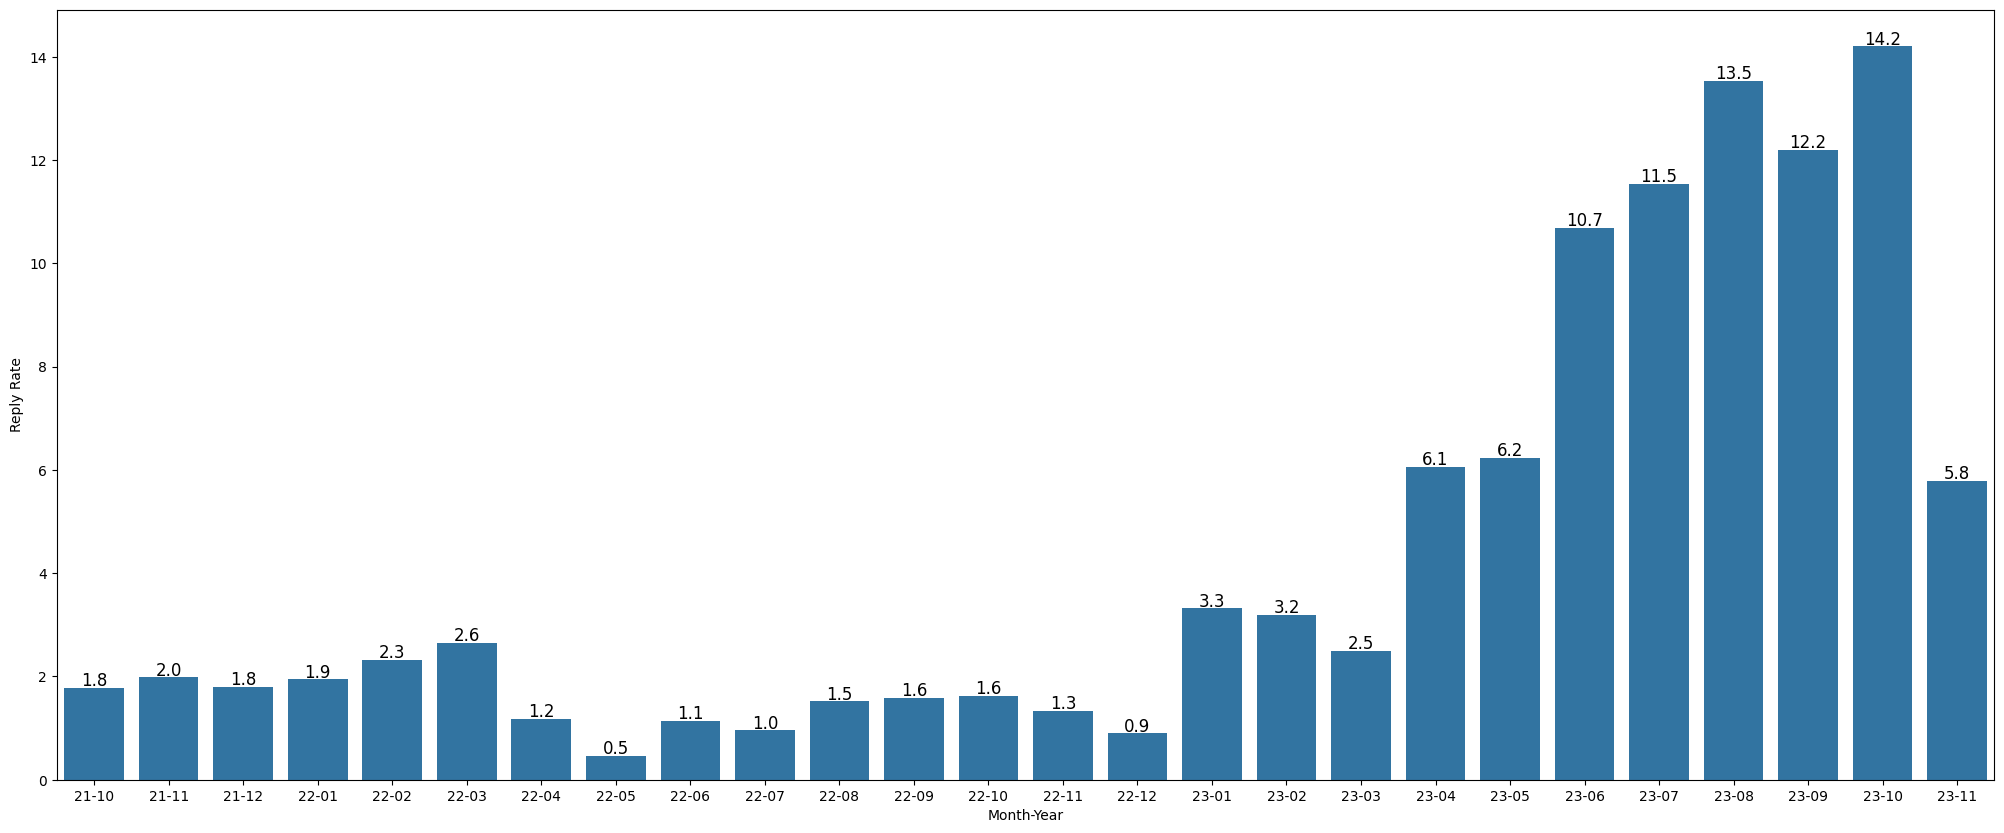

In [168]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate_for_high_ratings, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [169]:
df["time_taken_to_reply"] = ((df["company_reply_datetime"] - df["review_datetime"]).dt.total_seconds() / (60 * 60 * 24)).round()
# Replace NaN values with a placeholder (e.g., -1)
df["time_taken_to_reply"] = df["time_taken_to_reply"].fillna(-1).astype(int)

In [170]:
df.head(2)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime,Month-Year,time_taken_to_reply
20,Wise,6280b7c6f03a9893e98def64,4,"Usually very efficient,",Useful,2022-05-15,10:20:22,None,None,None,2022-05-15 10:20:22,NaT,22-05,-1
21,Wise,6280ad07166eb7ecbf474180,5,Wise is simple to use,"Wise is simple to use, v fast & gets it right ...",2022-05-15,09:34:31,None,None,None,2022-05-15 09:34:31,NaT,22-05,-1


In [171]:
replied = df[~df["company_reply_datetime"].isna()]

In [172]:
replies_over_time = replied.groupby('Month-Year').agg({'time_taken_to_reply': 'mean'}).reset_index()
replies_over_time['time_taken_to_reply'] = ratings_over_time['stars'].round(1)

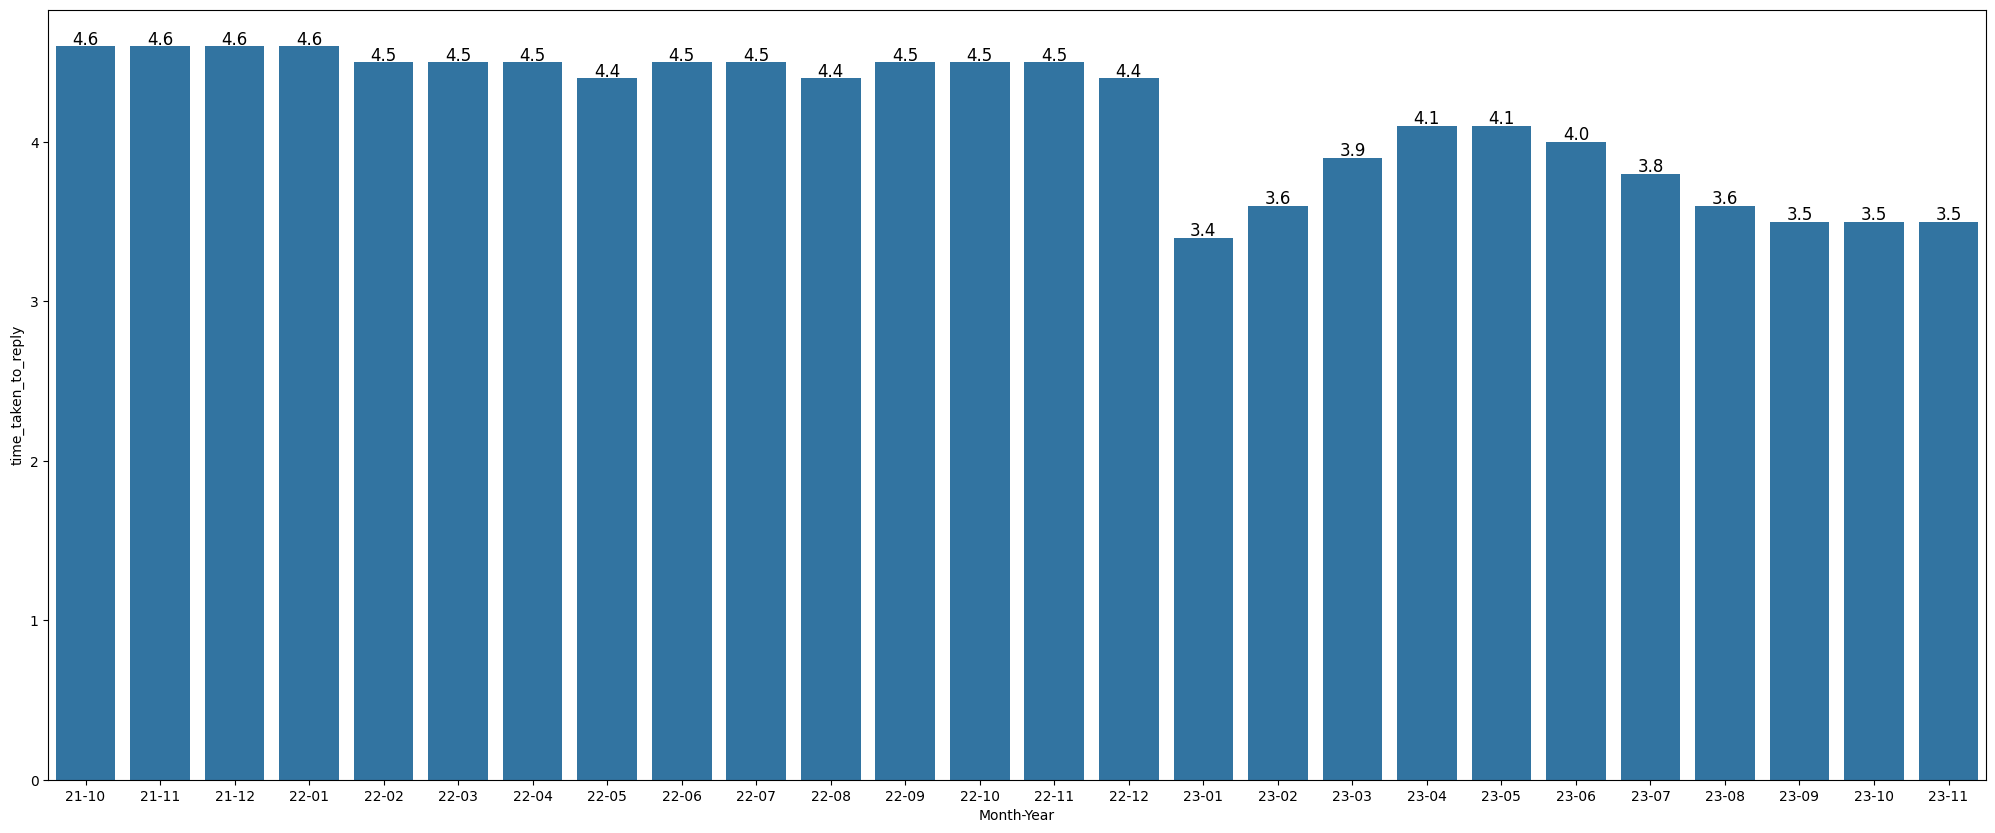

In [174]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=replies_over_time, x="Month-Year", y="time_taken_to_reply")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [178]:
replied_low_ratings = replied[replied["stars"]<=3]
replies_over_time_low_ratings = replied_low_ratings.groupby('Month-Year').agg({'time_taken_to_reply': 'mean'}).reset_index()
replies_over_time_low_ratings['time_taken_to_reply'] = replies_over_time_low_ratings['time_taken_to_reply'].round(1)

In [184]:
replied_low_ratings[replied_low_ratings["time_taken_to_reply"]<0]

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime,Month-Year,time_taken_to_reply
184,Wise,62ab3f25787382efe20e7f08,1,they are blocking money without reason…,they are blocking money without reason for 10 ...,2022-06-27,13:31:52,"Reply from Wise\nJun 22, 2022\nHello Marius,\n...",2022-06-22,08:37:49,2022-06-27 13:31:52,2022-06-22 08:37:49,22-06,-5
533,Wise,621d4074ba48cd57a2a58368,1,Money stuck for 11+ days already,The first transfer went through in second busi...,2022-03-29,04:26:29,"Reply from Wise\nMar 28, 2022\nHello Jeremy,\n...",2022-03-28,11:11:16,2022-03-29 04:26:29,2022-03-28 11:11:16,22-03,-1
684,Wise,634e4171377e522e3151e55a,1,A bunch of robbers,SOLVED AT LAST ! anyway thank you\n\nANSWER FR...,2022-10-25,02:12:16,"Reply from Wise\nOct 20, 2022\nHello Jerome,\n...",2022-10-20,02:04:21,2022-10-25 02:12:16,2022-10-20 02:04:21,22-10,-5
685,Wise,634e29f99b12f67dfee3f8b1,1,"A Scammer, Worst customer Service, Taking peop...","Wise is scammer, be aware of this company.\n\n...",2022-11-23,17:08:35,"Reply from Wise\nOct 18, 2022\nHello,\n\nWe're...",2022-10-18,07:16:24,2022-11-23 17:08:35,2022-10-18 07:16:24,22-11,-36
1357,Wise,624ae60b2b3c3c43cfc82d33,1,Zero star if possible,Zero star if possible.\n9 days after receipt o...,2022-05-23,09:47:45,"Reply from Wise\nMay 18, 2022\nHello there,\n\...",2022-05-18,09:12:47,2022-05-23 09:47:45,2022-05-18 09:12:47,22-05,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77594,Wise,61cd35af0430e828ebe29987,1,"wise is a scammer, and shtty company",wise is a scammer. i can see that you have blo...,2022-08-12,05:31:15,"Reply from Wise\nFeb 8, 2022\nHello Satoshi,\n...",2022-02-08,11:36:53,2022-08-12 05:31:15,2022-02-08 11:36:53,22-08,-185
78606,Wise,638f2c785873c1cf9fcc931a,1,Very unprofessional business support…,Very unprofessional business support for busin...,2022-12-07,09:09:21,"Reply from Wise\nDec 6, 2022\nHello, Oliver\n\...",2022-12-06,16:23:26,2022-12-07 09:09:21,2022-12-06 16:23:26,22-12,-1
78681,Wise,653c800c85da191a2fc64fbe,1,REALLY SLOW SUPPORT,The customer support for this company is terri...,2023-11-02,14:04:10,"Reply from Wise\n5 days ago\nHello,\n\nWe’re r...",2023-11-01,11:15:12,2023-11-02 14:04:10,2023-11-01 11:15:12,23-11,-1
78738,Wise,624320d6f144199fc9cd99e4,1,Unpredictable and poorly organized.,UPDATE: Just look at their response; no specif...,2022-05-06,15:09:59,"Reply from Wise\nMay 5, 2022\nHello Alexander,...",2022-05-05,09:09:09,2022-05-06 15:09:59,2022-05-05 09:09:09,22-05,-1


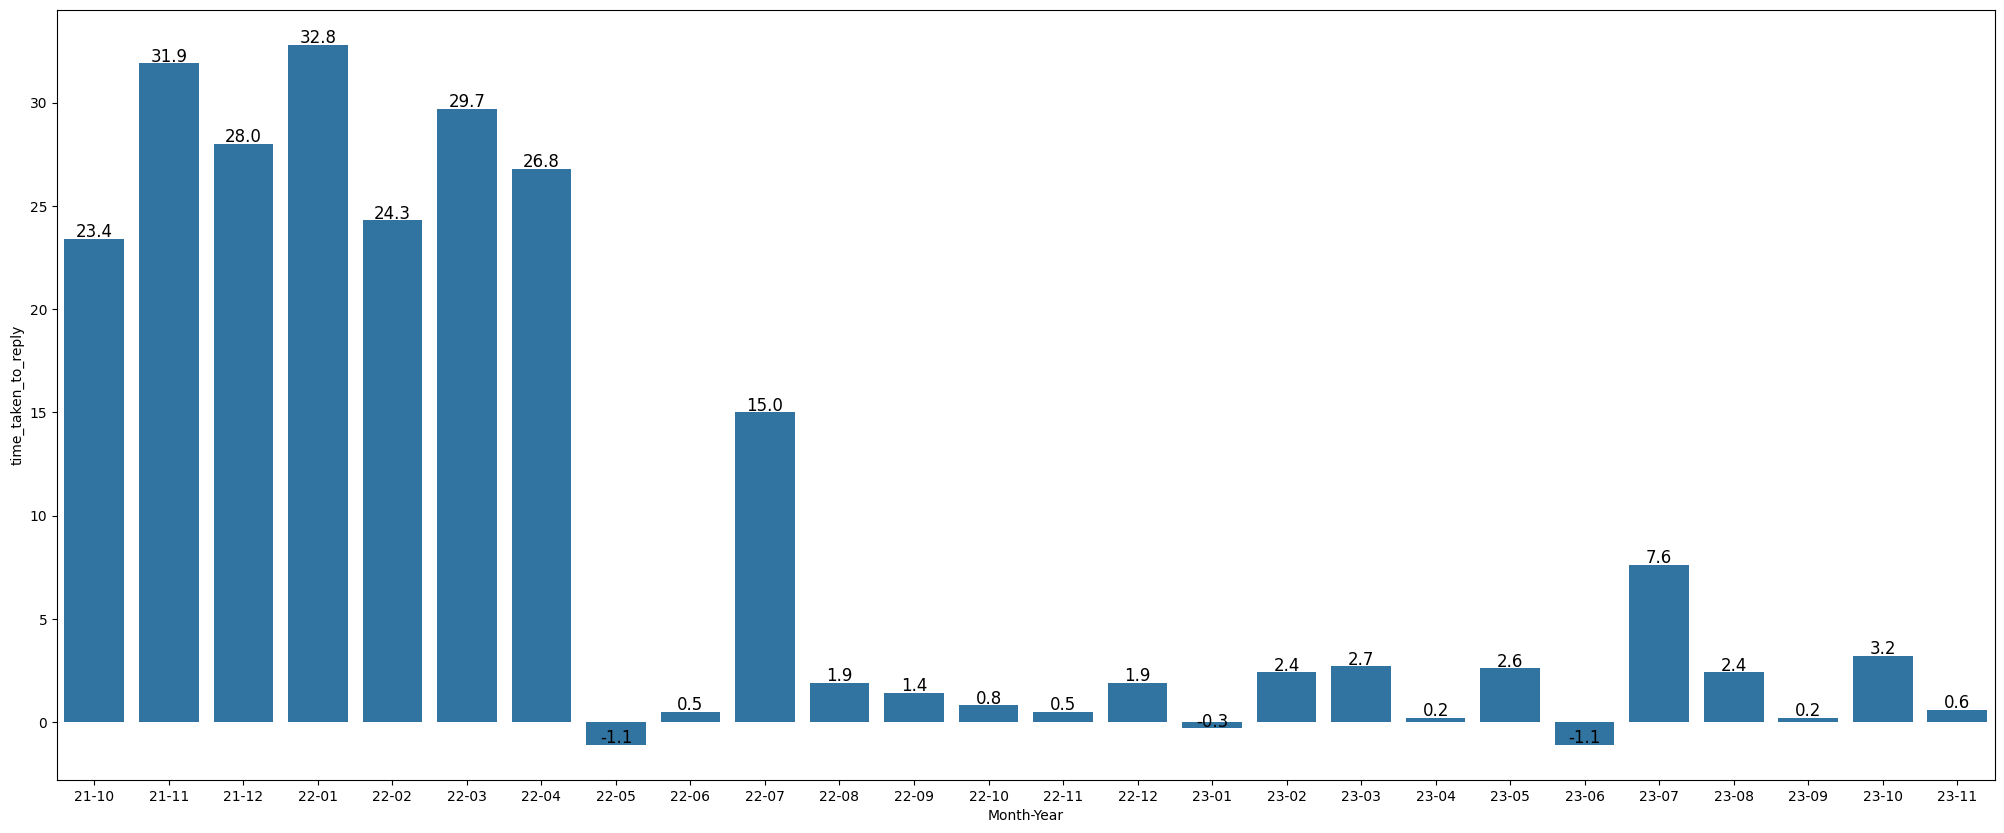

In [180]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=replies_over_time_low_ratings, x="Month-Year", y="time_taken_to_reply")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [181]:
replies_over_time_low_ratings

,Month-Year,time_taken_to_reply
0,21-10,23.4
1,21-11,31.9
2,21-12,28.0
3,22-01,32.8
4,22-02,24.3
5,22-03,29.7
6,22-04,26.8
7,22-05,-1.1
8,22-06,0.5
9,22-07,15.0
